In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorama

In [37]:
pm = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Code(0-40)/parameter_combinations.csv",header=0,index_col=[0])
# pm dataframe, let mutation rate times 3, and change search radius to 0.05, and gg to 0.05
pm["mutation_rate"] = pm["mutation_rate"]*3
pm["search_radius"] = 0.05
pm["gg"] = 0.05
print(colorama.Fore.GREEN+f"the shape of parameter combinations dataframe is {pm.shape}")
print(colorama.Fore.GREEN+f"there are {pm.shape[0]} parameter combinations in total")
print(colorama.Fore.GREEN+f"the parameters are as the following {pm.columns.tolist()}")
pm.to_csv("parameter_combinations.csv",header=True,index=True)

the shape of parameter combinations dataframe is (120, 17)
there are 120 parameter combinations in total
the parameters are as the following ['num_generations', 'mutation_rate', 'num_individuals', 'crossover_rate', 'mutation_type', 'crossover_type', 'local_search_rate', 'local_search_type', 'search_radius', 'threshold', 'dimensions', 'gg', 'selection_method', 'length_of_local_search', 'redo_local_search_rate', 'fitness_function', 'algorithm']


In [38]:
one = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Code(0-40)/solutions_dataframe.csv",header=0,index_col=0)
two = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Code(40-80)/solutions_dataframe.csv",header=0,index_col=0)
three = pd.read_csv("/Users/meijiaojiao/Desktop/Evolution_algorithm/Experiment16/Code(80-120)/solutions_dataframe.csv",header=0,index_col=0)
print(colorama.Fore.YELLOW+f"the shape of one is {one.shape}")
print(colorama.Fore.YELLOW+f"the shape of two is {two.shape}")
print(colorama.Fore.YELLOW+f"the shape of three is {three.shape}")
two.index = [i for i in range(40,40+two.shape[0])]
three.index = [i for i in range(80,80+three.shape[0])]
solution = pd.concat([one,two,three],axis=0)
print(colorama.Fore.YELLOW+f"the shape of solution is {solution.shape}")
solution.columns = ["Run"+str(i) for i in range(1,11,1)]
print(colorama.Fore.CYAN+f"the shape of solution dataframe is {solution.shape}")
print(colorama.Fore.CYAN+f"the columns of solution dataframe is the runs {solution.columns.tolist()}")
solution.to_csv("solutions_dataframe.csv",header=True,index=True)
print(solution.head(5))
solution = solution.stack()
solution = solution.rename_axis(["pm_index","Run"])
solution = solution.reset_index(name="fitness")
print(solution)

the shape of one is (40, 10)
the shape of two is (40, 10)
the shape of three is (40, 10)
the shape of solution is (120, 10)
the shape of solution dataframe is (120, 10)
the columns of solution dataframe is the runs ['Run1', 'Run2', 'Run3', 'Run4', 'Run5', 'Run6', 'Run7', 'Run8', 'Run9', 'Run10']
          Run1         Run2         Run3         Run4         Run5  \
0   978.515982  1161.819134  1272.457357  1316.579060  1152.049482   
1  1514.237097  1524.506935  1816.121965  1566.617972  1633.957395   
2  4703.029815  1467.530035  4133.001139  1620.922599  1780.198906   
3    -5.260943   -20.306399   -20.306398   -20.306399    -5.365721   
4   -20.306399   -10.110395   -10.201544    -5.260943   -10.201544   

          Run6         Run7         Run8         Run9        Run10  
0   798.891463  5205.235152  1908.328111  1166.754183  1127.593427  
1  1969.312689  1439.722213  1717.247226  2920.482831  2800.497357  
2  1243.595992  1380.176197  1511.616681  1529.408863  1499.707291  
3   -2

In [43]:
# combine the two dataframes
# pm is the parameter combinations dataframe
# solution is the solutions dataframe
# according to pm_index to combine the two dataframes
pm["pm_index"] = [i for i in range(0,pm.shape[0])]
df = pd.merge(pm,solution,on="pm_index")
print(colorama.Fore.RED+f"the shape of df is {df.shape}")
print(df)

the shape of df is (1200, 20)
      num_generations  mutation_rate  num_individuals  crossover_rate  \
0             1000000           0.06              200             0.5   
1             1000000           0.06              200             0.5   
2             1000000           0.06              200             0.5   
3             1000000           0.06              200             0.5   
4             1000000           0.06              200             0.5   
...               ...            ...              ...             ...   
1195          1000000           0.06              100             0.7   
1196          1000000           0.06              100             0.7   
1197          1000000           0.06              100             0.7   
1198          1000000           0.06              100             0.7   
1199          1000000           0.06              100             0.7   

     mutation_type           crossover_type  local_search_rate  \
0           Normal  Probabi

In [50]:
function_list = df["fitness_function"].unique().tolist()
dimensions_list = df["dimensions"].unique().tolist()
mutation_rate_list = df["mutation_rate"].unique().tolist()
cross_rate_list = df["crossover_rate"].unique().tolist()
mutation_type_list = df["mutation_type"].unique().tolist()
crossover_type_list = df["crossover_type"].unique().tolist()
local_search_rate_list = df["local_search_rate"].unique().tolist()
local_search_type_list = df["local_search_type"].unique().tolist()
search_radius_list = df["search_radius"].unique().tolist()
gg_list = df["gg"].unique().tolist()
selection_method_list = df["selection_method"].unique().tolist()
redo_local_search_rate_list = df["redo_local_search_rate"].unique().tolist()
length_of_local_search_list = df["length_of_local_search"].unique().tolist()
algorithm_list = df["algorithm"].unique().tolist()
# get all the unique values of these parameters
print(colorama.Fore.BLUE+f"the functions are {function_list}")
print(colorama.Fore.BLUE+f"the dimensions are {dimensions_list}")
print(colorama.Fore.BLUE+f"the mutation_rate are {mutation_rate_list}")
print(colorama.Fore.BLUE+f"the cross_rate are {cross_rate_list}")
print(colorama.Fore.BLUE+f"the mutation_type are {mutation_type_list}")
print(colorama.Fore.BLUE+f"the crossover_type are {crossover_type_list}")
print(colorama.Fore.BLUE+f"the local_search_rate are {local_search_rate_list}")
print(colorama.Fore.BLUE+f"the local_search_type are {local_search_type_list}")
print(colorama.Fore.BLUE+f"the search_radius are {search_radius_list}")
print(colorama.Fore.BLUE+f"the gg are {gg_list}")
print(colorama.Fore.BLUE+f"the redo_local_search_rate are {redo_local_search_rate_list}")
print(colorama.Fore.BLUE+f"the length_of_local_search are {length_of_local_search_list}")
print(colorama.Fore.BLUE+f"the selection_method are {selection_method_list}")
print(colorama.Fore.BLUE+f"the algorithm are {algorithm_list}")

the functions are [5, 21]
the dimensions are [100]
the mutation_rate are [0.06, 0.03]
the cross_rate are [0.5, 0.6, 0.7]
the mutation_type are ['Normal']
the crossover_type are ['Probabilistic_crossover']
the local_search_rate are [0.5]
the local_search_type are ['Uniform']
the search_radius are [0.05]
the gg are [0.05]
the redo_local_search_rate are [0.0, 0.2]
the length_of_local_search are [1, 4]
the selection_method are ['sorted_selection_part']
the algorithm are ['Baseline', 'Lamarck', 'Baldwin']


In [51]:
df.to_csv("df.csv",header=True,index=True)

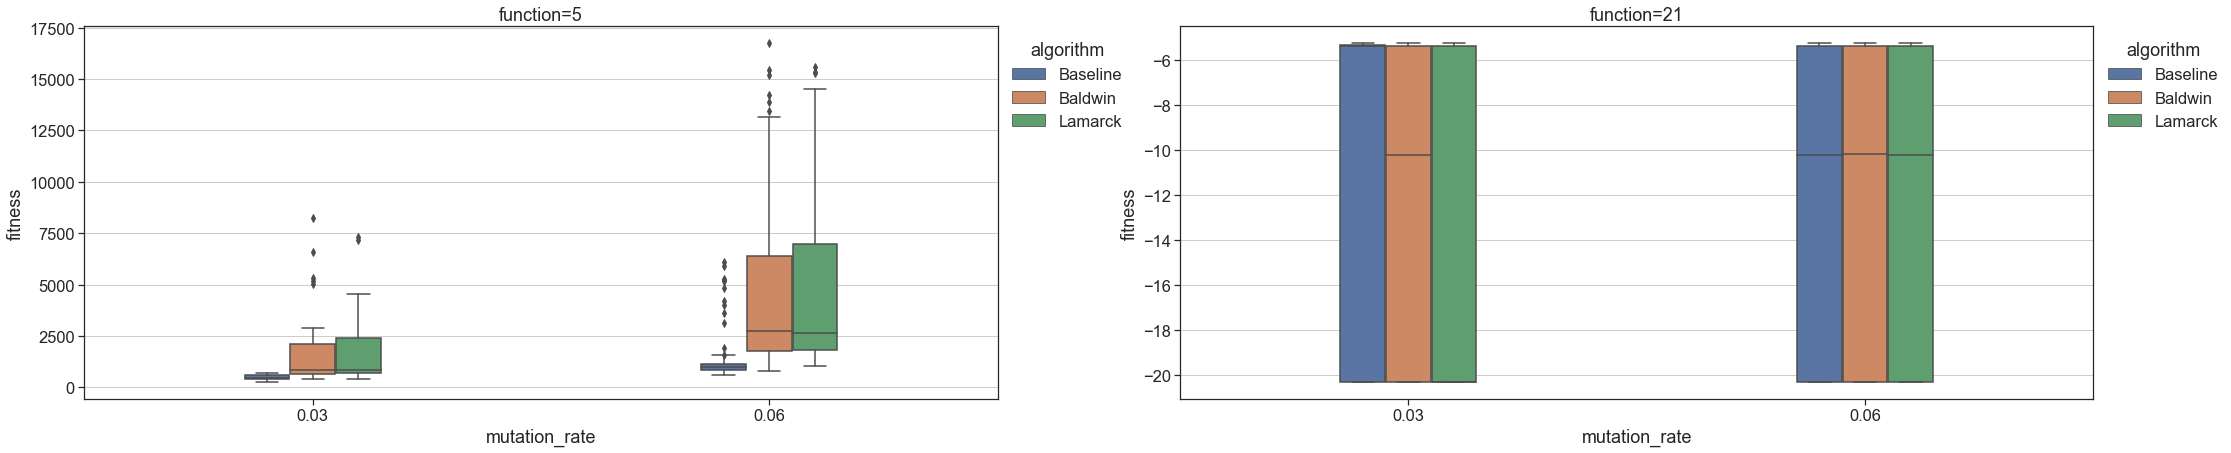

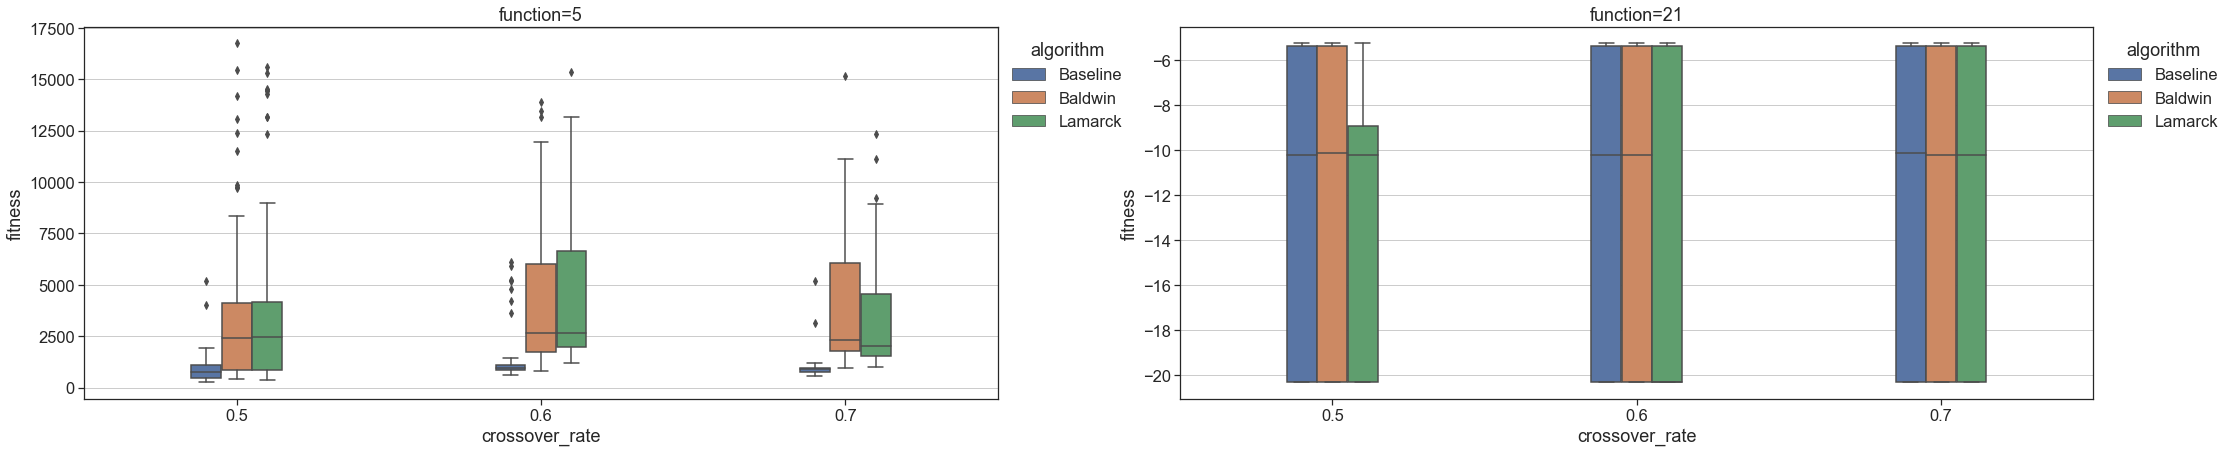

In [58]:
def show_graph(dataframe,xp):
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 2
    dist_rows = 6
    plt.figure(figsize=(18 * dist_cols, 8 * dist_rows))
    i = 1
    for func in function_list:
        data = dataframe[dataframe["fitness_function"] == func]
        plt.subplot(dist_rows, dist_cols, i)
        ax = sns.boxplot(data=data, y="fitness",x=xp,hue="algorithm",hue_order=["Baseline","Baldwin","Lamarck"],width=0.3)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),frameon=False)
        plt.title(f"function={func}")
        i = i + 1
    plt.savefig(f"{xp}.png", dpi=400,bbox_inches='tight')
    plt.show()
xp_list=['mutation_rate','crossover_rate']
for i in xp_list:
    show_graph(dataframe=df,xp=i)

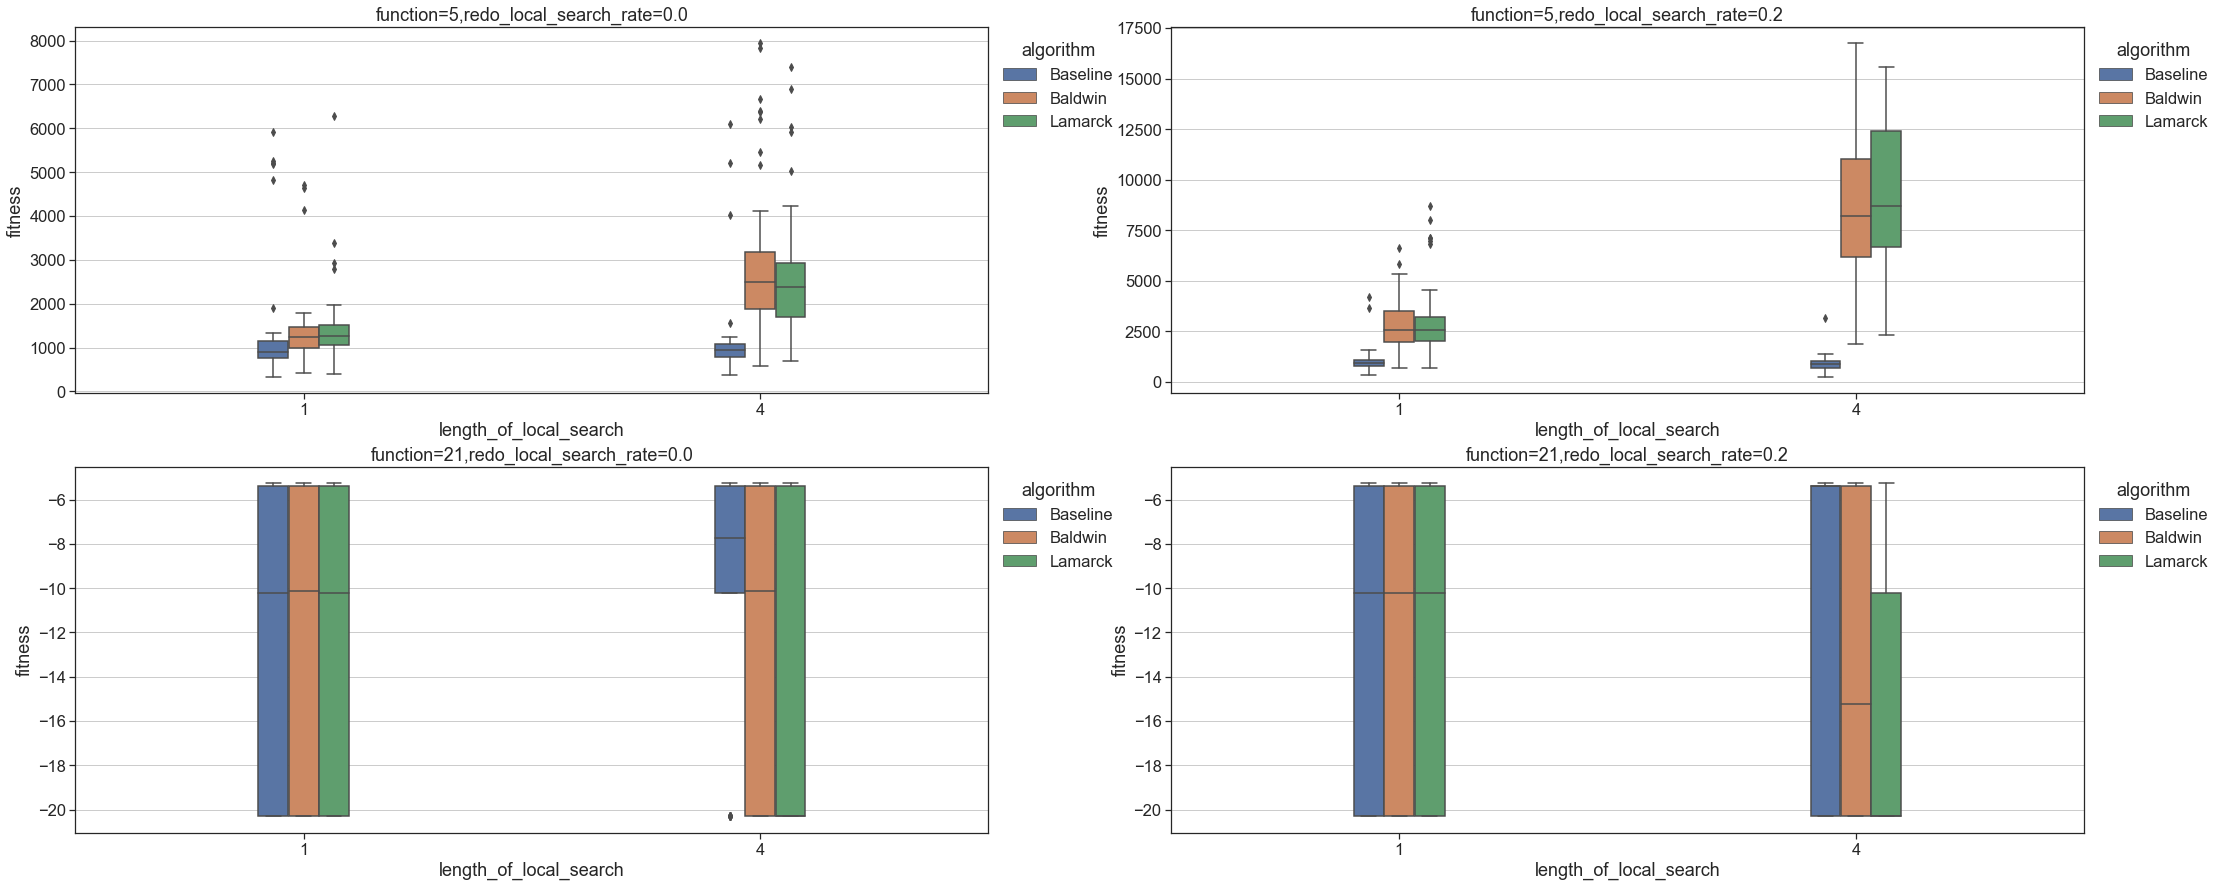

In [59]:
 def show_graph(dataframe,xp):
    rate = xp[0]
    tp = xp[1]
    sns.set_theme(style="whitegrid",font_scale=1.5)
    sns.set_style("ticks",{'axes.grid' : True})
    dist_cols = 2
    dist_rows = 15
    plt.figure(figsize=(18 * dist_cols, 8 * dist_rows))
    i = 1
    for func in function_list:
        for w in redo_local_search_rate_list:
            data = dataframe[dataframe["fitness_function"] == func]
            data = data[data[rate] == w]
            plt.subplot(dist_rows, dist_cols, i)
            ax = sns.boxplot(data=data, y="fitness",x=tp,hue="algorithm",hue_order=["Baseline","Baldwin","Lamarck"],width=0.2)
            sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1),frameon=False)
            plt.title(f"function={func},{rate}={w}")
            i = i + 1
    plt.savefig(f"{tp}combine.png", dpi=400,bbox_inches='tight')
    plt.show()
xp_list=[["redo_local_search_rate","length_of_local_search"]]
for i in xp_list:
    show_graph(dataframe=df,xp=i)